In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose

Analisando a Corelação entre as sazonalidades de cada segmento

In [2]:
df_saz = pd.read_csv('C:\\Users\\victo\\OneDrive\\Documentos\\github\\tcc-analise-setores-mercado-financeiro\\data\\df_sazonalidade.csv', index_col="Date")
df_saz.head()

,"Exploração, Refino e Distribuição",Equipamentos e Serviços,Minerais Metálicos,Siderurgia,Artefatos de Ferro e Aço,Artefatos de Cobre,Petroquímicos,Fertilizantes e Defensivos,Químicos Diversos,Madeira,...,Bancos,Soc. Crédito e Financiamento,Serviços Financeiros Diversos,Seguradoras,Resseguradoras,Corretoras de Seguros e Resseguros,Exploração de Imóveis,Intermediação Imobiliária,Holdings Diversificadas,Outros
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.138235,0.034587,0.357693,0.373453,0.182385,-0.029688,1.250599,0.206317,3.538749,-0.093440,...,-0.056189,-0.261880,-0.249399,-0.180929,0.086766,-0.187836,0.159437,-0.029311,0.209340,-0.529353
2013-01-03,0.145734,0.035004,0.361658,0.368914,0.180910,-0.025314,1.249958,0.239970,4.018358,-0.097537,...,-0.062097,-0.263957,-0.306772,-0.210724,0.169581,-0.178782,0.153411,-0.035630,0.189490,-0.497622
2013-01-04,0.147882,0.034631,0.403189,0.378966,0.140273,-0.025099,1.249317,0.219077,4.317360,-0.103468,...,-0.050042,-0.266053,-0.287498,-0.175880,0.194282,-0.159304,0.147845,-0.039252,0.202696,-0.532675
2013-01-07,0.136597,0.034685,0.386001,0.365475,0.145007,-0.026965,1.248684,0.216376,4.191111,-0.114487,...,-0.079964,-0.268094,-0.334030,-0.215715,0.170039,-0.156624,0.134553,-0.043367,0.186361,-0.512018
2013-01-08,0.141709,0.034685,0.350346,0.385712,0.144049,-0.032967,1.247997,0.228027,4.560650,-0.119951,...,-0.096378,-0.270094,-0.357967,-0.217414,0.110696,-0.161724,0.129375,-0.047804,0.246610,-0.528532


In [3]:
mtx_corr_saz = df_saz.corr()
mtx_corr_saz.head()

,"Exploração, Refino e Distribuição",Equipamentos e Serviços,Minerais Metálicos,Siderurgia,Artefatos de Ferro e Aço,Artefatos de Cobre,Petroquímicos,Fertilizantes e Defensivos,Químicos Diversos,Madeira,...,Bancos,Soc. Crédito e Financiamento,Serviços Financeiros Diversos,Seguradoras,Resseguradoras,Corretoras de Seguros e Resseguros,Exploração de Imóveis,Intermediação Imobiliária,Holdings Diversificadas,Outros
"Exploração, Refino e Distribuição",1.000000,0.538226,0.314995,0.602514,0.264690,0.240931,0.429075,0.371594,0.228964,0.079742,...,0.445427,-0.026550,0.431868,-0.074986,0.082858,0.592810,0.566126,0.526393,0.418467,0.011886
Equipamentos e Serviços,0.538226,1.000000,0.344134,0.607447,0.226712,0.195952,0.748316,0.636174,0.306912,-0.255429,...,-0.093257,-0.305810,0.067436,-0.240358,0.053660,0.346216,0.318656,0.474099,0.393077,-0.329006
Minerais Metálicos,0.314995,0.344134,1.000000,0.481442,-0.093850,0.097423,0.211215,0.308017,-0.113246,0.334550,...,0.499586,0.398540,0.467370,0.108818,0.023243,0.005744,0.677927,0.306525,-0.069993,0.087384
Siderurgia,0.602514,0.607447,0.481442,1.000000,0.505366,0.264721,0.585021,0.638340,0.669625,-0.141848,...,0.140036,-0.252563,-0.048039,-0.479799,0.245924,-0.069816,0.390175,0.189738,0.634040,-0.531094
Artefatos de Ferro e Aço,0.264690,0.226712,-0.093850,0.505366,1.000000,-0.178785,0.413743,0.508796,0.700257,-0.396405,...,-0.200208,-0.286312,-0.285260,-0.692128,-0.143178,-0.093522,0.018361,-0.298783,0.437409,-0.400541


In [4]:
segm_count = 0
for segmento in mtx_corr_saz.columns:
    
    segm_ref = segmento
    segm_corr_neg = mtx_corr_saz[segmento].idxmin()
    val_corr_neg = mtx_corr_saz[segmento].sort_values(ascending=True).iloc[0]
    

    if val_corr_neg < -0.7:
        segm_count += 1
        print(f"segmento analisado = {segm_ref}\nsegmento com maior correlação negativa = {segm_corr_neg}\nCorrelação = {val_corr_neg}\n")

print(f"Número de segmentos com correlação negativa superior a 70%: {segm_count}")

segmento analisado = Artefatos de Ferro e Aço
segmento com maior correlação negativa = Produtos Diversos
Correlação = -0.7061712718508167

segmento analisado = Fertilizantes e Defensivos
segmento com maior correlação negativa = Carnes e Derivados
Correlação = -0.7076696510126478

segmento analisado = Químicos Diversos
segmento com maior correlação negativa = Carnes e Derivados
Correlação = -0.8628905560019772

segmento analisado = Material Rodoviário
segmento com maior correlação negativa = Produtos Diversos
Correlação = -0.7033544236374836

segmento analisado = Motores, Compressores e Outros
segmento com maior correlação negativa = Resseguradoras
Correlação = -0.749166266370095

segmento analisado = Transporte Ferroviário
segmento com maior correlação negativa = Utensílios Domésticos
Correlação = -0.8281200086058687

segmento analisado = Carnes e Derivados
segmento com maior correlação negativa = Químicos Diversos
Correlação = -0.8628905560019772

segmento analisado = Alimentos Divers

Clusterizando os segmentos de mercado pela correlação entre suas sazonalidades

In [5]:
def gerar_modelo_kmeans(numero_clusters:int) -> dict:
    
    # instanciando um modelo de clusterização KMeans
    KMeans_model = KMeans(n_clusters=numero_clusters, max_iter=10_000, n_init=100, random_state=61658)
    # Aplicando modelo aos dados e obtendo os clusters atribuidos a cada segmento
    list_clusters = KMeans_model.fit_predict(mtx_corr_saz)
    # Acessando os centroides dos Clusters
    centroids = KMeans_model.cluster_centers_
    
    return {"modelo" : KMeans_model,
            "lista clusters" : list_clusters,
            "centroides" : centroids}

In [6]:
def analisar_cluster(df_corr_clust:pd.DataFrame, cluster:int) -> dict:
    
    #gerando df com os segmentos do cluster
    segm_clus = df_corr_clust.loc[df_corr_clust["clusters"] == cluster]
    
    for segmento in segm_clus.columns:
        if segmento in segm_clus.index:
            continue
        else:
            del segm_clus[segmento]
    
    # print(f"Número de segmentos no cluster: {segm_clus.shape[0]}")

    # Verificando a presença de correlações negativas entre segmentos do cluster.
    corr_neg_clus = False
    for segmento in segm_clus.index:
        for segmento_ in segm_clus.columns:
            if segm_clus.loc[segmento, segmento_] < 0:
                corr_neg_clus = True

    # if corr_neg_clus == True:
    #     print("Há correlações negativas entre segmentos do cluster.")
    # else:
    #     print("Não há correlações negativas entre segmentos do cluster.")
    
    return {"df_clus": segm_clus,
            "corr_neg_clus": corr_neg_clus,
            "num_segm_clus": segm_clus.shape[0]}

In [7]:
# Identificando melhor quantidade de clusters
for numero_clusters in range(2,20):
    
    kmeans_model = gerar_modelo_kmeans(numero_clusters)["modelo"]
    df_corr_clust = pd.DataFrame(mtx_corr_saz)
    df_corr_clust["clusters"] = gerar_modelo_kmeans(numero_clusters)["lista clusters"]

    
    corr_neg_model = False
    for cluster in range(0,numero_clusters):
        if analisar_cluster(df_corr_clust=df_corr_clust, cluster=cluster)["corr_neg_clus"] == True:
            corr_neg_model = True
            break
    
    if corr_neg_model == False:
        print(f"Nenhum cluster do modelo Kmeans gerado \ncom {numero_clusters} clusters apresenta correlação negativa \nentre os segmentos que o compõem.")
        break

c:\Users\victo\OneDrive\Documentos\github\tcc-analise-setores-mercado-financeiro\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\victo\OneDrive\Documentos\github\tcc-analise-setores-mercado-financeiro\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


Nenhum cluster do modelo Kmeans gerado 
com 14 clusters apresenta correlação negativa 
entre os segmentos que o compõem.


In [40]:
df_corr_clust[df_corr_clust["clusters"] == 0]

,"Exploração, Refino e Distribuição",Equipamentos e Serviços,Minerais Metálicos,Siderurgia,Artefatos de Ferro e Aço,Artefatos de Cobre,Petroquímicos,Fertilizantes e Defensivos,Químicos Diversos,Madeira,...,Soc. Crédito e Financiamento,Serviços Financeiros Diversos,Seguradoras,Resseguradoras,Corretoras de Seguros e Resseguros,Exploração de Imóveis,Intermediação Imobiliária,Holdings Diversificadas,Outros,clusters
"Exploração, Refino e Distribuição",1.000000,0.538226,0.314995,0.602514,0.264690,0.240931,0.429075,0.371594,0.228964,0.079742,...,-0.026550,0.431868,-0.074986,0.082858,0.592810,0.566126,0.526393,0.418467,0.011886,0
Computadores e Equipamentos,0.654077,0.186239,0.135115,0.031702,-0.169521,0.138875,-0.042501,0.022690,-0.239873,0.439502,...,0.113403,0.550780,0.360070,-0.019653,0.661202,0.427645,0.495309,-0.047174,0.458882,0
Corretoras de Seguros e Resseguros,0.592810,0.346216,0.005744,-0.069816,-0.093522,0.015685,0.188662,0.003677,-0.340730,0.084976,...,0.139793,0.562094,0.247227,-0.229883,1.000000,0.281701,0.570987,-0.130770,0.393898,0


In [38]:
df_corr_clust[df_corr_clust["clusters"] == 12]

,"Exploração, Refino e Distribuição",Equipamentos e Serviços,Minerais Metálicos,Siderurgia,Artefatos de Ferro e Aço,Artefatos de Cobre,Petroquímicos,Fertilizantes e Defensivos,Químicos Diversos,Madeira,...,Soc. Crédito e Financiamento,Serviços Financeiros Diversos,Seguradoras,Resseguradoras,Corretoras de Seguros e Resseguros,Exploração de Imóveis,Intermediação Imobiliária,Holdings Diversificadas,Outros,clusters
Papel e Celulose,0.246929,0.501383,0.505775,0.571362,0.252001,0.008417,0.322037,0.654483,0.388672,-0.012424,...,-0.058915,-0.035300,-0.246090,-0.006919,-0.183466,0.424475,0.032428,0.256538,-0.339698,12
Construção Pesada,-0.019156,0.191009,0.291459,0.247551,0.171144,0.067473,0.298010,0.305146,0.227680,-0.016205,...,-0.026250,-0.127082,-0.258357,0.075168,-0.266895,0.187090,0.018260,0.229498,-0.270034,12
Máq. e Equip. Construção e Agrícolas,0.162102,0.490514,0.078093,0.383728,0.178469,0.062931,0.533065,0.146218,0.212260,-0.262974,...,-0.226002,-0.145068,-0.187592,0.162676,-0.032793,-0.105688,0.135650,0.348264,-0.493396,12
Armas e Munições,0.438703,0.498943,0.563838,0.653053,0.457930,-0.115970,0.479744,0.655164,0.420356,-0.118891,...,0.014868,0.146318,-0.488857,-0.222168,0.070385,0.487636,0.061152,0.218390,-0.204289,12
Produtos de Limpeza,0.561805,0.828324,0.504720,0.606040,0.161081,0.147831,0.579417,0.568347,0.171646,-0.046851,...,-0.070548,0.342218,-0.132928,-0.040547,0.281246,0.511091,0.393304,0.253664,-0.203467,12


In [14]:
def remover_datas_sem_cotacao(df_hist: pd.DataFrame) -> None:
    df_hist.dropna(inplace=True, how="all")

In [15]:
def tratar_datas_pre_ipo(df_hist: pd.DataFrame) -> None:
    for ticker in df_hist.columns:

        data_ipo = df_hist[ticker].first_valid_index()

        for data in df_hist.index:

            if data < data_ipo:

                df_hist.loc[data, ticker] = 0

In [16]:
def tratar_cotacoes_ausentes(df_hist: pd.DataFrame) -> None:
    for ticker in df_hist.columns:
        df_hist[f"{ticker}"].ffill(inplace=True)

In [17]:
def tratar_cotacoes_inconsistentes(df_hist: pd.DataFrame) -> None:
    # Identificando ticker com cotações negativa
    tickers_neg = []
    for ticker in df_hist.columns:

        for cotacao in df_hist.index:

            if df_hist[f"{ticker}"][cotacao] < 0:

                tickers_neg.append(ticker)
    tickers_neg =list(set(tickers_neg))

    # Removendo tickers com valores de cotação negativa
    for ticker in tickers_neg:
        df_hist.drop(f"{ticker}", axis=1, inplace= True)

In [18]:
def tratar_hist_cot(df_hist: pd.DataFrame) -> None:
    
    # Removendo datas sem cotação (finais de semana, feriados, ...)
    remover_datas_sem_cotacao(df_hist)

    # Preenchendo datas anteriores a cada IPO com o valor de cotação 0
    tratar_datas_pre_ipo(df_hist)

    # Preenchendo cotações ausentes com o último valor válido
    tratar_cotacoes_ausentes(df_hist)

    # Removendo tickers com valores de cotação negativa
    tratar_cotacoes_inconsistentes(df_hist)

Agrupando as ações por cluster

In [27]:
data_inicial = '2013-01-01'
data_final = '2023-10-01'
datas = pd.date_range(start=data_inicial, end=data_final, freq='D')
df_media_clus = pd.DataFrame({'Date': datas}).set_index('Date')

for cluster in range(0,14):
    
    # Gerando lista de tickers do cluster
    lista_segm_clus = df_corr_clust.loc[df_corr_clust["clusters"] == cluster].index

    # Criando um dataframe com todas as datas como um índice
    data_inicial = '2013-01-01'
    data_final = '2023-10-01'
    datas = pd.date_range(start=data_inicial, end=data_final, freq='D')
    df_cluster = pd.DataFrame({'Date': datas}).set_index('Date')

    # Criando um dataframe com os históricos de cotação dos tickers do cluster
    for segmento in lista_segm_clus:

        df_hist_cot_ticker = pd.read_csv(
            f"C:\\Users\\victo\\OneDrive\\Documentos\\github\\tcc-analise-setores-mercado-financeiro\\data\\hist_cot_norm_agrup_segm\\{segmento}.csv",
            index_col="Date")
        
        for data in df_hist_cot_ticker.index:

            for ticker in df_hist_cot_ticker:

                df_cluster.loc[data, segmento] = df_hist_cot_ticker.loc[data, f"{ticker}"]
    
    tratar_hist_cot(df_cluster)

    # Gerando o histórico da média de cotações de cada cluster
    for data in df_cluster.index:
        
        soma_linha = 0
        cont_tickers_somados = 0
        
        for ticker in df_cluster.columns:
            
            cond_calc_media = df_cluster.loc[data, ticker] !=0 and not np.isnan(df_cluster.loc[data, ticker])
            if cond_calc_media:
                
                soma_linha += df_cluster.loc[data, ticker]
                cont_tickers_somados += 1
        
        if cont_tickers_somados > 0:
            df_cluster.loc[data, "media"] = soma_linha / cont_tickers_somados 
    
    # Adicinando o histórico da média de cotações de cada cluster ao dataframe
    for data in df_cluster.index:
        df_media_clus.loc[data, cluster] = df_cluster.loc[data, "media"]

# Removendo datas sem cotação (finais de semana, feriados, ...)
remover_datas_sem_cotacao(df_media_clus)
tratar_datas_pre_ipo(df_media_clus)
for cluster in df_media_clus.columns:
    df_media_clus[cluster].ffill(inplace=True)

In [31]:
# Criando o dataframe de sazonalidades dos clusters
df_saz_media_clus = pd.DataFrame(index = df_media_clus.index)

for cluster in df_media_clus.columns:

    # 22 dias de cotação por mês / 252 dias de cotação por ano / df_hist_cot.shape[0]//2 maior período possível para decomposição da base de dados
    
    df_saz_media_clus[cluster] = seasonal_decompose(df_media_clus[cluster],
                                                period = 252,
                                                model = "additive").seasonal

df_saz_media_clus.dropna(inplace=True)
# df_saz_clus.head()
# df_saz_clus[0].plot()

In [33]:
mtx_corr_entre_saz_clusters = df_saz_media_clus.corr()

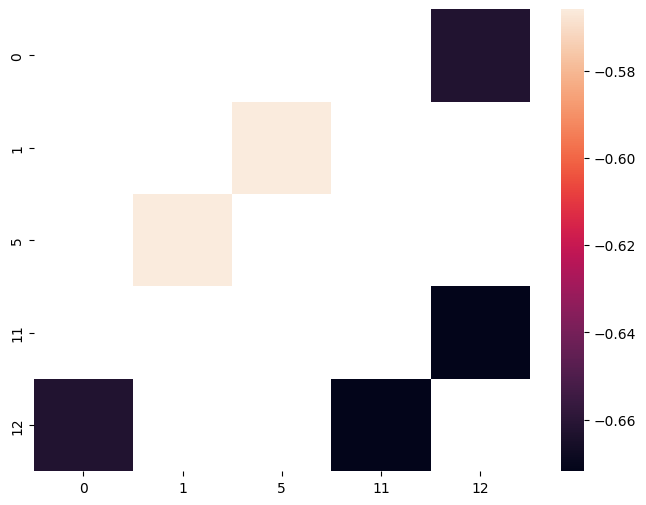

In [41]:
high_neg_corr = mtx_corr_entre_saz_clusters[mtx_corr_entre_saz_clusters <= -0.4].dropna(how="all", axis=0).dropna(how="all", axis=1)

# display(filtered_matrix)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(high_neg_corr, ax=ax, annot=False, cbar=True)
# sns.heatmap(high_neg_corr, ax=ax, annot=True, cbar=False)
plt.show()